In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data
import os

### 1. Write a function that takes a color image and an integer ‘n’ as input and returns a numpy array of size nx4 (n rows and 4 columns). This array should contain corner coordinates of n randomly generated boxes defined on the image in the order [r1, c1, r2, c2]. One such box is shown in the figure. Values r and c represent row and column numbers. Also, h>r2>r1, w>c2>c1 where h and w are the height and width of the image. Demonstrate the function on an image. The purpose of this exercise is to make sure you feel comfortable handling images, so write the code yourself, don’t use a library function to do this whole work even if you find one. [15] ###


In [2]:
def rectangles(image, n):
    rects = []
    rows = image.shape[0]
    cols = image.shape[1]
    for i in range(n):
        r1 = np.random.randint(0, rows-1)
        c1 = np.random.randint(0, cols-1)
        r2 = np.random.randint(r1+1, rows)
        c2 = np.random.randint(c1+1,cols)
        rects.append([r1,c1,r2,c2])
    return np.array(rects)


In [3]:
image = data.astronaut()
boxes = rectangles(image, 10)
boxes

array([[354, 300, 492, 407],
       [503, 295, 509, 437],
       [428, 129, 500, 290],
       [475, 317, 508, 348],
       [207, 440, 360, 450],
       [ 70, 297, 473, 395],
       [ 65, 331, 309, 415],
       [ 68, 270, 276, 497],
       [431, 186, 455, 267],
       [  1, 151, 357, 270]])

### 2. Write a function that takes a color image and four integers in the order r1, c1, r2, c2 and returns the image with a red rectangle drawn over it between these coordinates (Hint: setting the red pixel component to 255 and green and blue to 0 turns the pixel red). The thickness of the lines forming the rectangle is up to you but just one pixel thick would be enough. Demonstrate the function on an image. The purpose of this exercise is to make sure you feel comfortable handling images, so write the code yourself, don’t use a library function to do this whole work even if you find one. [15] ###

In [4]:
# There are other ways to do this assignment e.g., by drawing lines.
def drawbox(image, r1,c1,r2,c2):
    thickness=1 # optional
    color=(255,0,0) # red
    if len(image.shape)==2: # make sure image is capable of showing a red box
        image = np.stack((image, image, image), axis = 2)
    newimage = image.copy() # Don't ruin the actual image
    for plane in range(3):
        # First, draw a solid red rectangle over the given window
        newimage[r1:r2, c1:c2, plane] = color[plane]
        # Then, replace the inside of the rectangle with the pixels from the original image, leaving only the outline
        newimage[r1+thickness:r2-thickness,c1+thickness:c2-thickness,plane] = image[r1+thickness:r2-thickness,c1+thickness:c2-thickness,plane]
    return newimage
    
    

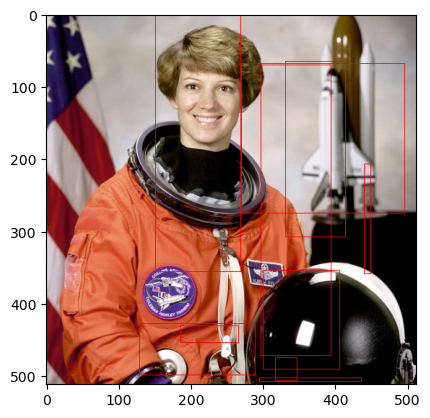

In [5]:
# Demonstrating it on just one box is enough
newImage = image.copy()
for i in range(boxes.shape[0]):
    newImage = drawbox(newImage, boxes[i,0], boxes[i,1], boxes[i,2], boxes[i,3])
    
plt.imshow(newImage)